Problema 3: Calcular el error estándar de las betas del modelo lineal, les expliqué la idea de este problema.

In [82]:
import pandas as pd
from math import sqrt
from statistics import mean
import numpy as np
import scipy as sc
import random
import scipy.stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [83]:
#cargar los datos y definir las variables

datos=pd.read_excel('lineal_horm.xlsx')
X_values=np.array(datos['horas'])
Y_values=np.array(datos['monto'])

# Volver un vector los datos

X_values=X_values.reshape(-1,1)
Y_values=Y_values.reshape(-1,1)

In [84]:
# Cargar la función de regresión lineal, definir el num de simulaciones y un vector en donde almacenaremos
#(B_0,B_1) respectivamente de la regresión, el vector en cada entrada tendrá un par ordenado

random.seed(123)

reg = linear_model.LinearRegression()
simul=2000
valores_intercept=np.array([]) 
valores_coef=np.array([])

for i in range(0,simul):
    
    ###### Inicio de Bootstrap ######
    indices_xi=np.random.choice(len(X_values),len(X_values),replace=True)
    indices_yi=np.random.choice(len(Y_values),len(Y_values),replace=True)
    
    x_i=X_values[indices_xi]
    y_i=Y_values[indices_yi]

    
    ##### Fin de bootstrap #####
    
    # Calculamos todas las regresion para cada remuestreo y guardamos sus parametros
    a_i=reg.fit(x_i,y_i)
    valores_intercept=np.append(valores_intercept,a_i.intercept_)
    valores_coef=np.append(valores_coef,a_i.coef_)

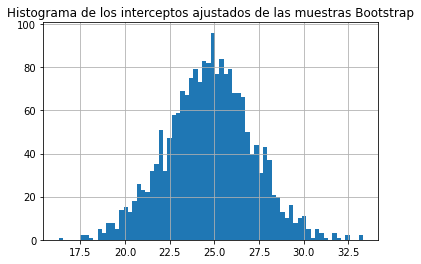

<Figure size 432x288 with 0 Axes>

In [144]:
plt.title('Histograma de los interceptos ajustados de las muestras Bootstrap')
plt.hist(valores_intercept, bins = 70)
plt.grid(True)
plt.show()
plt.clf()

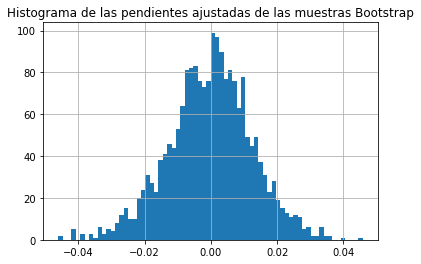

<Figure size 432x288 with 0 Axes>

In [146]:
plt.title('Histograma de las pendientes ajustadas de las muestras Bootstrap')
plt.hist(valores_coef, bins = 70)
plt.grid(True)
plt.show()
plt.clf()

In [87]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [88]:
mean_confidence_interval(valores_intercept, confidence=0.95)

(24.721747307873766, 24.616995796542504, 24.826498819205028)

In [89]:
mean_confidence_interval(valores_coef, confidence=0.95)

(-0.00022242565132376646, -0.0007786805676503064, 0.00033382926500277353)

Ahora vamos a calcular los errores estandar estimados de los parámetros obtenidos de las muestras bootstrap. Usamos la formula:
$\\$
$ \hat{se_{boot}}= \sqrt{\sum_{j = 1}^{B} \frac{(S(X^{j})-\sum_{j = 1}^{B} \frac{S(X^{j})}{B})^{2}}{B-1}}$


In [147]:

def se_boot(X):
    B = len(X)
    sum1 = mean(X)
    sum2 = 0
    for j in range(B):
        sum2 += ((X[j] - sum1)**2)/(B - 1)
    return sqrt(sum2)
    
        
        


In [92]:
#el error estandar estimado para el intercepto
se_intercept = se_boot(valores_intercept)

In [93]:
se_intercept

2.3887140755523473

In [94]:
# el error estandar estimado para la pendiente
media_boot_intercept = mean(valores_intercept)

In [95]:
media_boot_intercept

24.72174730787377

In [96]:
# el intervalo centrado en la media de los valores calculados del intercepto 
#a partir de la muestra bootstrap, con radio error estandar estimado
[media_boot_intercept - se_intercept,media_boot_intercept + se_intercept]

[22.333033232321423, 27.110461383426117]

vemos que el intervalo para el intercepto centrado en la media y de radio error estandar es más grande que el intervalo de confianza que se obtuvo anteriormente

In [97]:
#el error estandar estimado para la pendiente

se_coef=se_boot(valores_coef)

In [98]:
se_coef

0.01268462794796769

In [129]:
media_boot_coef = mean(valores_coef)

In [130]:
# el intervalo centrado en la media de los valores calculados de la pendiente 
#a partir de la muestra bootstrap, con radio error estandar estimado
[media_boot_coef-se_coef,media_boot_coef+se_coef]

[-0.012907053599291457, 0.012462202296643925]

vemos que los intervalos "clásicos" no coinciden con los intervalos que creamos centramos en la media de los estimadores "Bootstrap" con radio el error estandar, de hecho son más grandes, con una significancia menos exigente se podrían acercar más ambos intervalos.